<a href="https://colab.research.google.com/github/smartgh0/Flood-Risk-Ranking/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Colab to Github

In [3]:
#
!git config --global user.name "smartgh0"
!git config --global user.email "smartgh2015@gmail.com"

In [74]:
! git clone https://github.com/smartgh0/Flood-Risk-Ranking.git

Cloning into 'Flood-Risk-Ranking'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


# Import libraries

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pgeocode
import pgeocode

# Connect to Google drive

In [6]:
# mount google drive to get access to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Source and url

In [7]:
# Data downloaded source: https://www.riskfinder.org/county/galveston-county.tx.us?comparisonType=postal-code&forecastType=NOAA2017_int_p50&level=10&unit=ft&zillowModel=BK&zillowPlaceType=postal-code
url = '/content/drive/MyDrive/RCEL_506/project/Dataflood-galveston.txt'

# Read in CSV data line by line

In [8]:
import csv  # Use csv read to read txt file

with open(url, 'r') as file:
    reader = csv.reader(file, delimiter='\t') # read file using \t as seperator
    for i, row in enumerate(reader):
        print(f"Line {i}: {row}") # preview read lines for further action



Line 0: ['TITLE: LOCAL SEA LEVEL RISE AND COASTAL FLOOD RISK PROJECTIONS FOR HOMES']
Line 1: []
Line 2: ['FORMAT: Tab-delimited text (open/import from within spreadsheet software)']
Line 3: []
Line 4: ['CONTENTS']
Line 5: ['* Header material: Sources; Critical Notes; Details; Citation; Disclaimer; Variables; Model Sensitivity Levels; Table Index']
Line 6: ['* Projected Risk of Yearly Flooding']
Line 7: []
Line 8: ['SOURCES']
Line 9: ['* Findings from Surging Seas at http://riskfinder.org/, a project of the sea level program at Climate Central (http://climatecentral.org/)']
Line 10: ['* Housing data and estimated property values (“Zestimates”):']
Line 11: ['      Zestimate data provided by Zillow; address and build year data were provided by Zillow through the Zillow Transaction and Assessment Dataset (ZTRAX)']
Line 12: ['* Global sea level rise model:']
Line 13: ['      Kopp, R. E., Horton, R. M., Little, C. M., Mitrovica, J. X., Oppenheimer, M., Rasmussen, D. J., Strauss, B. H. and Te


# Read and save data into DataFrames

In [9]:

# Read data into list and different dataframe
data = []
with open(url, 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        data.append(row)

# Step 2: Convert the list of lists into a DataFrame
# Assuming the first row contains the column headers
df1 = pd.DataFrame(data[77:163], columns=data[76])
df2 = pd.DataFrame(data[169:255], columns=data[76])
df3 = pd.DataFrame(data[261:347], columns=data[76])
df4 = pd.DataFrame(data[353:439], columns=data[76])
df5 = pd.DataFrame(data[445:531], columns=data[76])
df6 = pd.DataFrame(data[537:623], columns=data[76])

# Combine DataFrames to a Single DataFrame

In [10]:
# initialize new dataframe dff and combine in all data
dff = pd.concat([df1,df2,df3,df4,df5,df6])
dff.head(3) #check first 3 columns of df


,Location,TotalCount,TotalZestimate,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,...,CountSince2010_p95,ZestimateAll_p05,ZestimateAll_p50,ZestimateAll_p95,ZestimateSince2000_p05,ZestimateSince2000_p50,ZestimateSince2000_p95,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95
0,77012,3745,459319044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77015,12855,1726777623,4,5,6,0,0,0,0,...,0,301234,369482,438136,0,0,0,0,0,0
2,77044,14661,3142038592,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dff.info() # check data types

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 85
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Location                516 non-null    object
 1   TotalCount              516 non-null    object
 2   TotalZestimate          516 non-null    object
 3   CountAll_p05            516 non-null    object
 4   CountAll_p50            516 non-null    object
 5   CountAll_p95            516 non-null    object
 6   CountSince2000_p05      516 non-null    object
 7   CountSince2000_p50      516 non-null    object
 8   CountSince2000_p95      516 non-null    object
 9   CountSince2010_p05      516 non-null    object
 10  CountSince2010_p50      516 non-null    object
 11  CountSince2010_p95      516 non-null    object
 12  ZestimateAll_p05        516 non-null    object
 13  ZestimateAll_p50        516 non-null    object
 14  ZestimateAll_p95        516 non-null    object
 15  ZestimateSin

#DATA PREPROCESSING
- Separate DataFrame into Descriptors and Target
- Drop Location and TotalZestimate columns. The values of TotalZestimate was too high and "Location" was actually selected as target

In [12]:

descriptors=dff.drop(columns=["Location","TotalZestimate"]) # drop some columns



In [13]:
target = dff["Location"] # Create target DataFrame

# EXPLORATORY DATA ANALYSIS
- Check types of all columns of the dataframe
- Check Shape of Dataframe
- Check number of columns
- Check descriptors statistics

In [14]:
descriptors.info() # Check descriptors datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TotalCount              516 non-null    object
 1   CountAll_p05            516 non-null    object
 2   CountAll_p50            516 non-null    object
 3   CountAll_p95            516 non-null    object
 4   CountSince2000_p05      516 non-null    object
 5   CountSince2000_p50      516 non-null    object
 6   CountSince2000_p95      516 non-null    object
 7   CountSince2010_p05      516 non-null    object
 8   CountSince2010_p50      516 non-null    object
 9   CountSince2010_p95      516 non-null    object
 10  ZestimateAll_p05        516 non-null    object
 11  ZestimateAll_p50        516 non-null    object
 12  ZestimateAll_p95        516 non-null    object
 13  ZestimateSince2000_p05  516 non-null    object
 14  ZestimateSince2000_p50  516 non-null    object
 15  ZestimateSin

In [15]:
descriptors.shape # Check shape of descriptors

(516, 19)

In [16]:

target = target.astype(int) #change target type to int, use it for color coding

In [17]:
descriptors.describe() # Check descriptors statistics

,TotalCount,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,CountSince2010_p50,CountSince2010_p95,ZestimateAll_p05,ZestimateAll_p50,ZestimateAll_p95,ZestimateSince2000_p05,ZestimateSince2000_p50,ZestimateSince2000_p95,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95
count,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516
unique,86,171,193,224,87,103,119,58,63,78,262,294,321,171,201,218,117,146,163
top,3745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,6,148,121,89,242,221,204,303,284,258,148,121,89,242,221,204,303,284,258


# Machine Learning Implementation
* Build Unsupervised ML model to identify clusters using;
* PCA
* Dendogram
* K-Means

# Normalize descriptors

In [18]:
# Normalize data using different methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

trfminmax =MinMaxScaler()
trfscalre=StandardScaler()
trfrobust=RobustScaler()
trfmaxabs=MaxAbsScaler()
trfquantile=QuantileTransformer()
trfpower=PowerTransformer()

df3minmax=trfminmax.fit_transform(descriptors)
df3scalre=trfscalre.fit_transform(descriptors)
df3robust=trfrobust.fit_transform(descriptors)
df3maxabs=trfmaxabs.fit_transform(descriptors)
df3power=trfpower.fit_transform(descriptors)





In [19]:
df3minmax =df3minmax

# Build PCA

In [20]:
# Start PCA
from sklearn.decomposition import PCA
n =df3minmax.shape[1]
pca3 = PCA(n_components=df3minmax.shape[1])
pca3.fit(df3minmax)


PCA(n_components=19)

# Check explained_variance_ratio of PCA

In [21]:
pca3.explained_variance_ratio_.sum() # Confirm the sum of all variance ratio

1.0

# Use the elbow rule to select optimal dimension or components

In [22]:
# Create a function for the Elbow Rule

def elbow_rule(pca, PCA_n=2):
  X=len(pca.explained_variance_ratio_)
  y=pca.explained_variance_ratio_[:PCA_n].sum().round(3)
  plt.plot(np.arange(1, X+1), pca.explained_variance_ratio_.cumsum(), label="Cumulative Explained Variance")
  plt.xlabel("Principal components")
  plt.ylabel("Acumulative explained variance ratio")
  plt.title("PCA Anaysis -Elbow Rule ")
  plt.vlines(PCA_n,0,1, linestyles='--', color="Red", label="Proposed PCA")
  texto="PCA="+str(PCA_n)+"\nVar="+str(y)
  plt.text(PCA_n*1.01, y*0.99, texto)
  plt.ylim(pca.explained_variance_ratio_[0],1.02)
  plt.legend()
  plt.show()

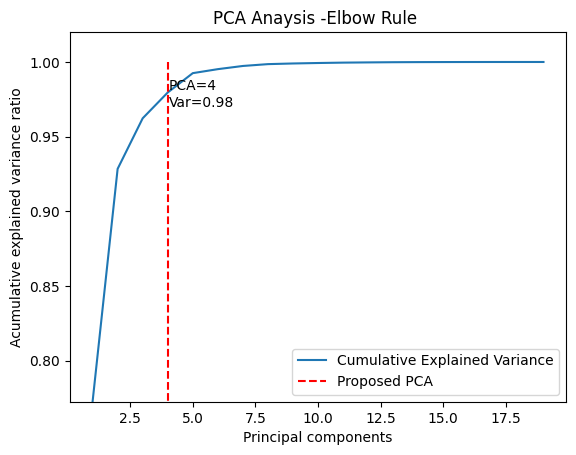

In [23]:
elbow_rule(pca3, 4) #test the elbow rule for 5 components

# convert pca into DataFrame

In [24]:
pcaf = PCA(n_components=4)
pcaf.fit(df3minmax)
pcaf.explained_variance_ratio_.sum()

0.9795579198442966

In [25]:
X_pca = pcaf.transform(df3minmax)
df_PCA = pd.DataFrame(X_pca, columns=["PCA_"+str(n) for n in range(1, X_pca.shape[1]+1)])
df_PCA.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.136388,-0.084309,-0.008803,-0.011022
1,-0.115585,0.246276,0.001573,-0.016796
2,-0.112288,0.311835,0.003920,-0.018736
3,-0.118903,0.119375,-0.004117,-0.010422
4,-0.056822,-0.069956,-0.031411,0.025269


In [26]:
df_PCA.shape

(516, 4)

# Plot pca DataFrame for two component

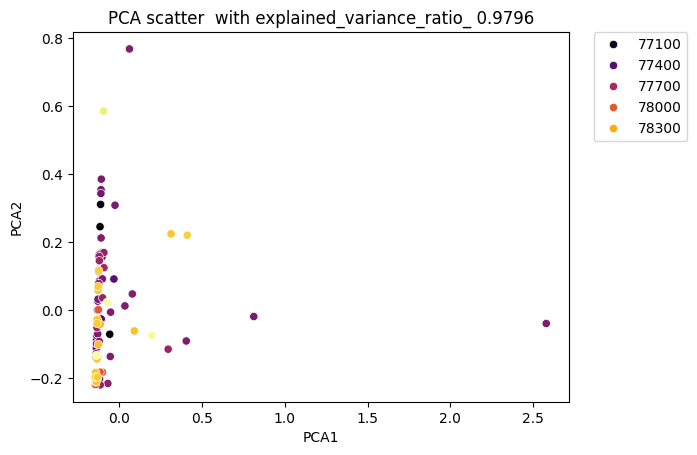

In [27]:
# Plotting my pca
fig, axs = plt.subplots()
sns.scatterplot(data=df_PCA, x="PCA_1",
                y="PCA_2",
                ax=axs, hue= df1.Location.astype(int),palette="inferno")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA scatter "+ " with explained_variance_ratio_ " + str(round(pcaf.explained_variance_ratio_.sum(),4)))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#

In [28]:
pcaf.explained_variance_ratio_

array([0.77244561, 0.15596549, 0.0338697 , 0.01727712])

In [29]:
!pip install plotly
import plotly.express as px
# plot 3D figure
fig = px.scatter_3d(df_PCA, x='PCA_1', y='PCA_2', z=dff.Location, color=dff.Location.astype(int))
# add title and labels
fig.update_layout(title='3D PCA Scatter Plot with Location',scene=dict(xaxis_title='PCA_1', yaxis_title='PCA_2', zaxis_title='Location'),title_x=0.5)
fig.write_html("3dpca.html")
fig.show()

#

# Using TSNE

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(df3minmax)



In [31]:
X_tsne = tsne.fit_transform(df3minmax)
dff_tsne = pd.DataFrame(X_tsne, columns=["tsne_"+str(n) for n in range(1, X_tsne.shape[1]+1)])
dff_tsne.head()

,tsne_1,tsne_2,tsne_3
0,6.047781,-5.247666,-6.287411
1,4.258581,11.566276,5.166411
2,6.593271,11.534923,6.048098
3,-1.205364,13.072869,-1.795501
4,1.443991,-2.040730,-2.799707


In [32]:
dff_tsne.shape

(516, 3)

<ipython-input-33-0205fb06920c>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



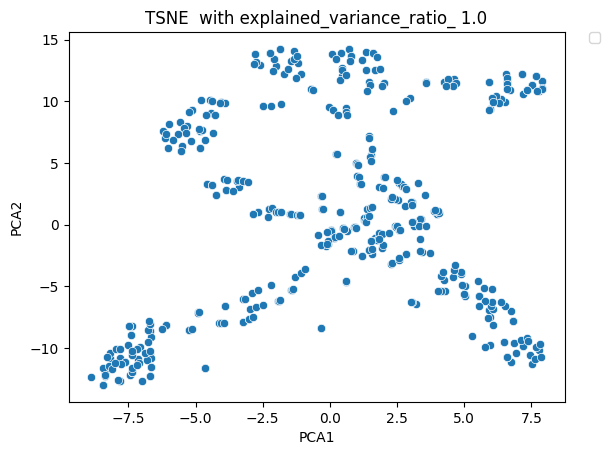

In [33]:
# Plotting my pca
fig, axs = plt.subplots()
sns.scatterplot(data=dff_tsne, x="tsne_1",
                y="tsne_2",
                ax=axs,palette="inferno")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("TSNE "+ " with explained_variance_ratio_ " + str(round(pca3.explained_variance_ratio_.sum(),4)))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [34]:
import plotly.express as px

# plot 3D figure
fig = px.scatter_3d(dff_tsne, x='tsne_1', y='tsne_2', z=dff.Location, color=dff.Location.astype(int))
fig.show()
#

# K-means implementation  and Plots

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'PCA2')

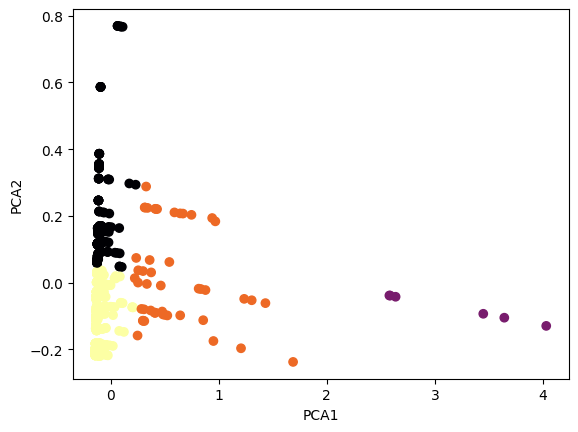

In [35]:
# Kmeans for PCA data

from sklearn.cluster import KMeans # import Kmeans library
model1 = KMeans(n_clusters=4, random_state=42) # set number of clusters to 6
kmeans_pca = model1.fit(X_pca) # fit model to PCA data

labels_pca = kmeans_pca.labels_ # Save label for model

# Visualize clusters using  kmeans pca labels
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=kmeans_pca.labels_,
            cmap='inferno')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



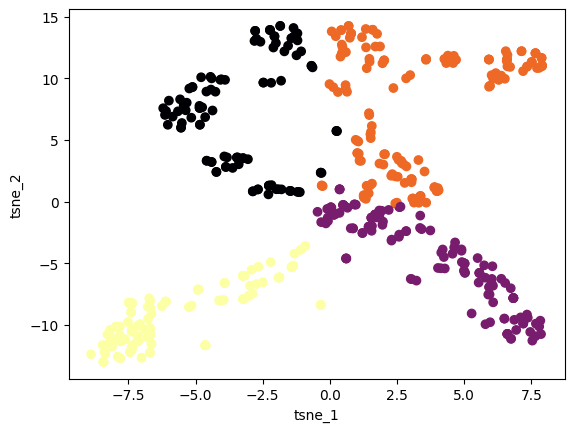

In [36]:
# Kmeans for TSNE data
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters=4, random_state=43)

kmeans_tsne = model2.fit(X_tsne) # fit kmeans model to tsne
labels_tsne = kmeans_tsne.labels_ # get labels form the tsne

# Visualize clusters using kmeans tsne labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='inferno')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.show()

In [37]:
centroids_tsne = kmeans_tsne.cluster_centers_
print(centroids_tsne)


[[-3.1766007  7.065954  -4.5638914]
 [ 3.690202  -4.5663366 -4.176734 ]
 [ 3.2364197  7.527613   4.8360853]
 [-5.7051845 -9.420652   2.7211704]]


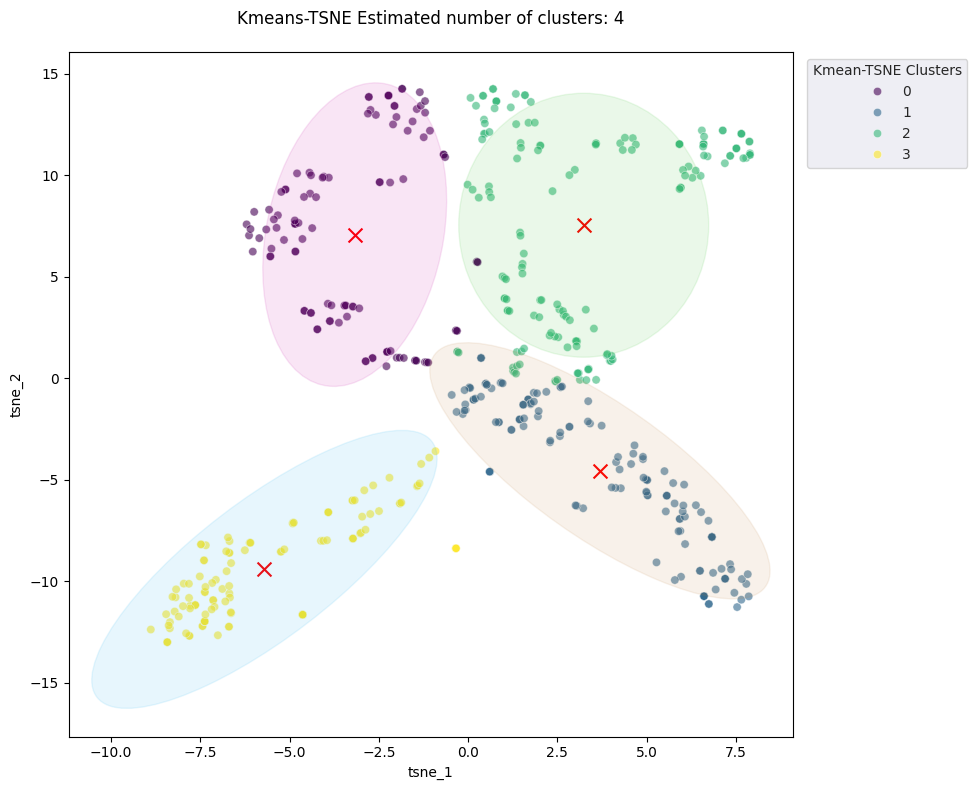

In [38]:
from matplotlib.patches import Ellipse

centroids = kmeans_tsne.cluster_centers_ # compute centriod from kmeans
fig, axs = plt.subplots(figsize=(10,8))
np.random.seed(10)

sns.set_style("darkgrid")
sns.scatterplot( x=X_tsne[:,0], y=X_tsne[:,1],  hue=labels_tsne, palette='viridis', ax=axs, legend='full', alpha=0.6)

axs.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", c="red", s=100)
axs.set_title("Kmeans-TSNE Estimated number of clusters: 4", pad=20)
axs.set_xlabel("tsne_1")
axs.set_ylabel("tsne_2")

# Add ellipses to plot
angulos= []
ancho= [5, 5, 13, 5] # adjust elipse vertical size
largo= [15, 15,7,16] # adjust elipse horizontal size
angles = [-5,35,90,-33] #adjust angle or tilt

# assign elispse to each centriod
for i in range(4):
  x = centroids[i,0]
  y = centroids[i,1]
  w = ancho[i]
  h = largo[i]
  angle=angles[i]
  axs.add_patch(Ellipse((x,y), w, h, angle=angle ,color=(np.random.rand(),np.random.rand(),np.random.rand(),0.1))) # add elispse urisn patch

# Add legend to plot
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles, labels, title="Kmean-TSNE Clusters", loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

In [39]:
df_pca = dff.copy()
df_tsne = dff.copy()


In [40]:
df_pca.shape

(516, 21)

# Add labels to DataFrame

In [41]:
df_pca["cluster_pca"] = labels_pca
df_tsne["cluster_tsne"] = labels_tsne

In [42]:
df_pca.head()
df_tsne.head()

,Location,TotalCount,TotalZestimate,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,...,ZestimateAll_p05,ZestimateAll_p50,ZestimateAll_p95,ZestimateSince2000_p05,ZestimateSince2000_p50,ZestimateSince2000_p95,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95,cluster_tsne
0,77012,3745,459319044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,77015,12855,1726777623,4,5,6,0,0,0,0,...,301234,369482,438136,0,0,0,0,0,0,2
2,77044,14661,3142038592,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,77049,9362,1581613853,17,24,31,0,1,2,0,...,4376082,6373768,8101289,0,405567,641360,0,0,0,0
4,77058,4229,1040101017,194,210,307,7,8,17,2,...,66632743,73486064,121640948,6547774,7050538,11000624,2915519,3418283,3418283,1


In [43]:
df_tsne = df_tsne.rename(columns={'Location': 'zipcodes'}) # Rename the location column to zipcodes
df_pca = df_pca.rename(columns={'Location': 'zipcodes'})


In [44]:
df_tsne.head()

,zipcodes,TotalCount,TotalZestimate,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,...,ZestimateAll_p05,ZestimateAll_p50,ZestimateAll_p95,ZestimateSince2000_p05,ZestimateSince2000_p50,ZestimateSince2000_p95,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95,cluster_tsne
0,77012,3745,459319044,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,77015,12855,1726777623,4,5,6,0,0,0,0,...,301234,369482,438136,0,0,0,0,0,0,2
2,77044,14661,3142038592,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,77049,9362,1581613853,17,24,31,0,1,2,0,...,4376082,6373768,8101289,0,405567,641360,0,0,0,0
4,77058,4229,1040101017,194,210,307,7,8,17,2,...,66632743,73486064,121640948,6547774,7050538,11000624,2915519,3418283,3418283,1


In [45]:
listzips =zipcode_list = dff['Location'].tolist() # create list of zipcodes

# Convert zipcodes to longitude and latitude using pgeocode

In [46]:

import pgeocode
nomi=pgeocode.Nominatim('us')
geogalv = nomi.query_postal_code(listzips)

In [47]:
geogalv.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,77012,US,Houston,Texas,TX,Harris,201.0,None,NaN,29.7149,-95.2819,4.0
1,77015,US,Houston,Texas,TX,Harris,201.0,None,NaN,29.7853,-95.1852,4.0
2,77044,US,Houston,Texas,TX,Harris,201.0,None,NaN,29.8635,-95.1976,4.0
3,77049,US,Houston,Texas,TX,Harris,201.0,None,NaN,29.8235,-95.1848,4.0
4,77058,US,Houston,Texas,TX,Harris,201.0,None,NaN,29.5716,-95.0998,4.0


In [48]:
col = ["postal_code","county_name","latitude","longitude", "county_code"] # select only columns in col for geogalv


In [49]:
geogalv = geogalv[col]
geogalv.head()


,postal_code,county_name,latitude,longitude,county_code
0,77012,Harris,29.7149,-95.2819,201.0
1,77015,Harris,29.7853,-95.1852,201.0
2,77044,Harris,29.8635,-95.1976,201.0
3,77049,Harris,29.8235,-95.1848,201.0
4,77058,Harris,29.5716,-95.0998,201.0


In [50]:
# merge new latitude and lontidue with dataframe and remove duplicates
import pandas as pd
df_final_tsne = pd.merge(df_tsne, geogalv[['postal_code', 'latitude', 'longitude',"county_name", "county_code"]], left_on='zipcodes', right_on='postal_code', how='left')
df_final_tsne.drop_duplicates(inplace=True)
df_final_pca = pd.merge(df_pca, geogalv[['postal_code', 'latitude', 'longitude',"county_name", "county_code"]], left_on='zipcodes', right_on='postal_code', how='left')
df_final_pca.drop_duplicates(inplace=True)

In [51]:
df_final_pca.head() # check the first 5 rows

,zipcodes,TotalCount,TotalZestimate,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,...,ZestimateSince2000_p95,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95,cluster_pca,postal_code,latitude,longitude,county_name,county_code
0,77012,3745,459319044,0,0,0,0,0,0,0,...,0,0,0,0,3,77012,29.7149,-95.2819,Harris,201.0
6,77015,12855,1726777623,4,5,6,0,0,0,0,...,0,0,0,0,0,77015,29.7853,-95.1852,Harris,201.0
12,77044,14661,3142038592,0,0,0,0,0,0,0,...,0,0,0,0,0,77044,29.8635,-95.1976,Harris,201.0
18,77049,9362,1581613853,17,24,31,0,1,2,0,...,641360,0,0,0,0,77049,29.8235,-95.1848,Harris,201.0
24,77058,4229,1040101017,194,210,307,7,8,17,2,...,11000624,2915519,3418283,3418283,3,77058,29.5716,-95.0998,Harris,201.0


# Create Risk mappings for labels

In [52]:
# Create risk mappings for the labels but did not use it in the project because of what we read during this course: How high is very High risk in this case?

# Calculate the total counts for each cluster
cluster_counts_tsne = df_final_tsne.groupby('cluster_tsne')['TotalCount'].sum()
cluster_counts_pca = df_final_pca.groupby('cluster_pca')['TotalCount'].sum()

# Sort clusters by TotalCounts in descending order
sorted_clusters_tsne = cluster_counts_tsne.sort_values(ascending=True)
sorted_clusters_pca = cluster_counts_pca.sort_values(ascending=True)

# Create a dictionary to map clusters to risk labels
risk_labels_tsne = {
    sorted_clusters_tsne.index[0]: 'Very High Risk',
    sorted_clusters_tsne.index[1]: 'High Risk',
    sorted_clusters_tsne.index[2]: 'Medium Risk',
    sorted_clusters_tsne.index[3]: 'Low Risk',
}

risk_labels_pca = {
    sorted_clusters_pca.index[0]: 'Very High Risk',
    sorted_clusters_pca.index[1]: 'High Risk',
    sorted_clusters_pca.index[2]: 'Medium Risk',
    sorted_clusters_pca.index[3]: 'Low Risk',
}

# Add a new column for risk labels
df_final_tsne['Risk Label'] = df_final_tsne['cluster_tsne'].map(risk_labels_tsne)
df_final_pca['Risk Label'] = df_final_pca['cluster_pca'].map(risk_labels_pca)




In [53]:
df_final_tsne.tail()

,zipcodes,TotalCount,TotalZestimate,CountAll_p05,CountAll_p50,CountAll_p95,CountSince2000_p05,CountSince2000_p50,CountSince2000_p95,CountSince2010_p05,...,ZestimateSince2010_p05,ZestimateSince2010_p50,ZestimateSince2010_p95,cluster_tsne,postal_code,latitude,longitude,county_name,county_code,Risk Label
3066,78418,12942,3116232041,1274,1660,3981,242,316,825,41,...,20596292,29705323,85463528,2,78418,27.6349,-97.3103,Nueces,355.0,Very High Risk
3072,78521,22227,1750521486,0,0,36,0,0,0,0,...,0,0,0,2,78521,25.9221,-97.4612,Cameron,61.0,Very High Risk
3078,78578,4603,766498082,799,1144,1584,209,291,356,40,...,8413194,11180136,13004966,2,78578,26.0539,-97.3125,Cameron,61.0,Very High Risk
3084,78583,2438,271601133,7,11,50,3,4,11,2,...,336879,336879,406935,1,78583,26.2339,-97.5513,Cameron,61.0,Medium Risk
3090,78597,6774,2189890449,324,1398,2803,20,73,179,3,...,924473,2742406,6896468,2,78597,26.2393,-97.1936,Cameron,61.0,Very High Risk


In [54]:
#create a new df_final with only rows with county_names  Galveston for plotting

df_final_tsne = df_final_tsne[df_final_tsne['county_name'] == 'Galveston']
df_final_pca = df_final_pca[df_final_pca['county_name'] == 'Galveston']


In [55]:

risk_df = pd.DataFrame(list(risk_labels_tsne.items()), columns=['Clusters', "Risk Labels"]) # mape risk labels to risk rankings I created.
print(risk_df)

   Clusters     Risk Labels
0         2  Very High Risk
1         3       High Risk
2         1     Medium Risk
3         0        Low Risk


In [56]:
risk_df_pca = pd.DataFrame(list(risk_labels_pca.items()), columns=['Clusters', 'Risk Labels'])
print(risk_df)

   Clusters     Risk Labels
0         2  Very High Risk
1         3       High Risk
2         1     Medium Risk
3         0        Low Risk


In [57]:
tx_url ="https://raw.githubusercontent.com/edavgaun/topojson/master/countries/united-states/higher-quality-5m/5m-US-counties.json" # load map data for boundary map plotting

In [58]:
df_final_tsne.shape

(67, 28)

In [59]:
import geopandas as gpd  # import Geopandas and load json file
tx = gpd.read_file(tx_url)

In [60]:
galv =tx[tx['NAME']=='Galveston'] # select galveston county from map

# Data Visulization on Maps

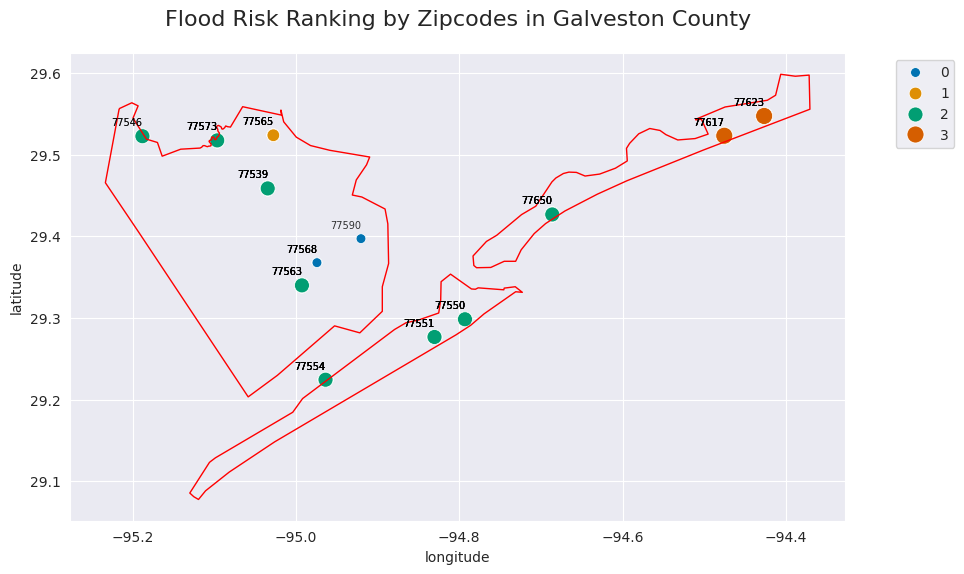

In [61]:
# plot zipcodes locations on Galveston county boundary map

import matplotlib.patches as mpatches
fig, axs = plt.subplots(figsize=(10, 10))
# chose plot style
sns.set_style("darkgrid")
# Plot the Galveston shape map
galv.boundary.plot(ax=axs, edgecolor='red', linewidth=1)
# Plot the points on the map
# Scatter plot
sns.scatterplot(
    data=df_final_tsne,
    x="longitude",
    y="latitude",
    hue="cluster_tsne",
    ax=axs,
    size="cluster_tsne",
    sizes=(50, 150),
    legend=True,
    palette="colorblind",
    edgecolor='w',

)
# Add legend

axs.legend(bbox_to_anchor=[1.15, 1])

# Boundary plot


for idx, row in df_final_pca.iterrows():
    axs.annotate(
        row['zipcodes'],                      # Text to display (ZIP code)
        (row['longitude'], row['latitude']),  # Point location
        textcoords="offset points",
        xytext=(0, 10),                        # Offset text from the point
        ha='right',                            # Horizontal alignment
        va='center',                           # Vertical alignment
        fontsize=7,                            # Font size
        color='black',
        alpha=.8

    )



# Create custom legend handles based on df_risk DataFrame
axs.set_title("Flood Risk Ranking by Zipcodes in Galveston County", fontsize=16, pad=20)

plt.show()


# Geospatial Visaulization

In [62]:
# used folium, find more about it -->: https://github.com/python-visualization/folium

import folium

# Create a map centered on Galveston County and set starting zoom
galveston_map = folium.Map(location=[29.3013, -94.9977], zoom_start=10)

# Define a color map for the clusters
color_map = {
    0: 'green',
    1: 'orange',
    2: 'yellow',
    3: 'red',

}

# Add markers for each zip code, colored by risk level
for _, row in df_final_tsne.iterrows():
    cluster_tsne = row['cluster_tsne']
    color = color_map.get(cluster_tsne, 'gray')  # Default to gray if cluster not in color_map

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Zip Code: {row['zipcodes']}<br>Risk Level: {cluster_tsne}",
        icon=folium.Icon(color=color)
    ).add_to(galveston_map)

# Create a legend  for the map
legend_html = """
    <div style="position: fixed;
                bottom: 700px; left: 1600px; width: 200px; height: 200px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white;padding: 10px;
                ">
                <center>
        <h4 style="text-align: center; margin-bottom: 10px;">Clusters by Kmeans-TSNE</h4>
        <p><i class="fa fa-circle fa-1x" style="color:red"></i>3</p>
        <p><i class="fa fa-circle fa-1x" style="color:orange"></i>1</p>
        <p><i class="fa fa-circle fa-1x" style="color:yellow"></i>2</p>
        <p><i class="fa fa-circle fa-1x" style="color:green"></i>0</p>
        </center>
    </div>
"""
galveston_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
galveston_map.save('galveston_map.html')  # save map as html so that can easily emmbed it in webpages
galveston_map




<ipython-input-62-80e58f40252a>:25: UserWarning:

color argument of Icon should be one of: {'darkpurple', 'gray', 'beige', 'cadetblue', 'lightgray', 'black', 'pink', 'blue', 'purple', 'green', 'lightblue', 'lightgreen', 'orange', 'darkgreen', 'darkred', 'lightred', 'red', 'white', 'darkblue'}.



# Extra Activity
- Sunburt for the project flow :)

In [63]:
# create surburt for the project flow

import plotly.graph_objects as go

# Define the hierarchy with improved label formatting
labels = [
    'Flood Risk<br>Ranking Project',
    'Data Source<br>& Wrangling',
    'Data<br>Preprocessing',
    'Unsupervised<br>Machine Learning',
    'Visualization',
    'Data Source:<br>riskfinder.org<br>Zillow',
    'Data Cleaning:<br>21 columns<br>516 observations',
    'Descriptors:<br>19 features<br>MinMaxScaler',
    'Elbow Rule:<br>k=4',
    'PCA:<br>Rejected!',
    't-SNE:<br>Selected!',
    'K-Means<br>Clustering',
    'Geospatial<br>Visualization',
    '3D & 2D<br>Scatter Plots'
]

parents = [
    '',
    'Flood Risk<br>Ranking Project',
    'Flood Risk<br>Ranking Project',
    'Flood Risk<br>Ranking Project',
    'Flood Risk<br>Ranking Project',
    'Data Source<br>& Wrangling',
    'Data Source<br>& Wrangling',
    'Data<br>Preprocessing',
    'Unsupervised<br>Machine Learning',
    'Unsupervised<br>Machine Learning',
    'Unsupervised<br>Machine Learning',
    'Visualization',
    'Visualization',
    'Visualization'
]

# Assign colors for each category
colors = [
    '#FF7F0E',  # Main project node
    '#1F77B4', '#1F77B4', '#1F77B4', '#1F77B4',  # Child nodes
    '#AEC7E8', '#AEC7E8',  # Data Source & Wrangling children
    '#98DF8A',  # Data Preprocessing child
    '#FFBB78', '#FFBB78', '#FFBB78',  # Unsupervised ML children
    '#C5B0D5', '#C5B0D5', '#C5B0D5'  # Visualization children
]

# Build the optimized Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    branchvalues="total",
    marker=dict(colors=colors),
))

# Update layout with optimized settings
fig.update_layout(
    title="RCEL Project",
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,  # Center the title
    paper_bgcolor='white',
    font=dict(color='Black'),
    margin=dict(t=50, l=10, r=10, b=10)
)

# Save and show the figure
fig.write_html("Project_Optimized.html")
fig.show()


In [69]:
!mv /content/drive/MyDrive/RCEL_506/project/Finalproject.ipynb /content/Flood-Risk-Ranking

In [70]:
%cd /content/Flood-Risk-Ranking/

/content/Flood-Risk-Ranking


In [71]:
!git add .

In [72]:
!git commit -m "First updated from google colab"

[main 76bc8d8] First updated from google colab
 1 file changed, 1 insertion(+)
 create mode 100644 Finalproject.ipynb


In [82]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [101]:
#
!git config --global user.name "smartgh0"
!git config --global user.email "smartgh2015@gmail.com"

In [102]:
!git branch

* main


In [103]:
!ssh-keygen -t rsa -b 4096 -C "smartgh2015@gmail.com"


Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): ^C


In [109]:
!eval "$(ssh-agent -s)"
!ssh-add /content/Flood-Risk-Ranking/smartgh.pub


Agent pid 9699
Could not open a connection to your authentication agent.


In [111]:
!ssh-add ~/.ssh/smartgh


Could not open a connection to your authentication agent.


In [113]:
!cat ~/.ssh/smartgh.pub


cat: /root/.ssh/smartgh.pub: No such file or directory


In [114]:
!eval "$(ssh-agent -s)"


Agent pid 9807


In [115]:
!ssh-add ~/.ssh/id_rsa

Could not open a connection to your authentication agent.


In [90]:
# prompt: Authenticate github via SSH

!git config --global user.email "smartgh2015@gmail.com"
!git config --global user.name "smartgh0"
!git config --global user.email "smartgh2015@gmail.com
!ssh-keygen -t rsa -b 4096 -C "smartgh2015@gmail.com"
!cat ~/.ssh/id_rsa.pub # copy and add this to github > settings > SSH and GPG keys
!ssh -T git@github.com # test connection


/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file
Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): smartgh
Enter passphrase (empty for no passphrase): smartgh
Enter same passphrase again: smartgh
Your identification has been saved in smartgh
Your public key has been saved in smartgh.pub
The key fingerprint is:
SHA256:uWFIHTRQQ2/Dmv6RMLAnaosRMwzWliP/n2CBYgUu3A0 smartgh2015@gmail.com
The key's randomart image is:
+---[RSA 4096]----+
| . E  .=B        |
|o + +  . *       |
|o= B .o . =      |
|oo= o. + = .     |
| o=o .+ S        |
|. .+...= = .     |
|  . o+  o o      |
|   +..o .. .     |
|  . .  o  .      |
+----[SHA256]-----+
cat: /root/.ssh/id_rsa.pub: No such file or directory
Host key verification failed.


In [117]:
!cat /content/Flood-Risk-Ranking/smartgh.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCq+Wu5uFoY7romUXR9a7/dQnhb9f6AbQIXmyLlrT/TgsSlWRXUIAS9r9d6PwiI5dnFSX4JKLthCjWzuGgpEyhiRhfDzT8VRwqtbku/nVZ2N7V+H6yDGWLZ8FS9O0MX+FCRowWxQK8fL917Jtr2WhkqesC/rfoqlKmmqnS+u+byAPgkrWw7queWGiRf0SvQ9uwbY/+yQHT+GUBTckhcQEtS9h4h8m3ZK6KRGSKqnDlFuypks1zb7akqoRWB60EAcKIxseCYeHVGOmxr82eQ7+ZRrMoGT3zGNqrVjGMQvR9niUZz6VWmnwgJCEsYGOUcRsQyXeMEqW4S6zIWQQtC98NdRRJ4JH8QnpM2bjqPce++6J6BSJYKGYQYJn9c7RjeWl+8borkQ2YMxxBYqv9MkRT3qNb5fXmGIQEfS8xj8w88rNESRlLp/PbfRIrsJsE3mXYqpYeAwQvuGGaIkgEd/8gmtYqG8A26jfioZig2AUXeDBBTh7Lmv9UbIZb/w1akhZe0QvAt6f2qpGkGlq9mOjSFDZrRMIy/fvEC7kTkSaQuG8MPYlqUsmcag90WvSvS5Qg5t/K7XW9W+D6VM+sK6kQexskB/13haAzqP8QlxDzrmT0Qe7LO3TAG30cmprM7TX8c46zRRfahXCDKRDhgBGCumhZT4c90eoztQQHAL8urow== smartgh2015@gmail.com


In [116]:
!git remote set-url origin git@github.com:smartgh0/Flood-Risk-Ranking.git

In [121]:
!git push origin main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
